In [19]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [137]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [5]:
!kaggle competitions download -c udea-ai4eng-20242

  0% 0.00/20.1M [00:00<?, ?B/s]
100% 20.1M/20.1M [00:00<00:00, 247MB/s]


In [6]:
!unzip udea-ai4eng-20242.zip

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [138]:
z = pd.read_csv('train.csv')

In [139]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [140]:
z.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [141]:
# Preprocesamiento de los datos

z.shape

(692500, 12)

El dataset cuenta con un total de 692500 datos


In [142]:
# Datos faltantes
k = z.isna().sum()

# Cuantos datos faltantes en cada columna
variablesFaltantes = k[k!=0]

print(variablesFaltantes)


ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO           6498
dtype: int64


In [143]:
for c in z.columns:
    print ("%20s"%c, z[c].dtype)

                  ID int64
             PERIODO int64
 ESTU_PRGM_ACADEMICO object
ESTU_PRGM_DEPARTAMENTO object
ESTU_VALORMATRICULAUNIVERSIDAD object
ESTU_HORASSEMANATRABAJA object
FAMI_ESTRATOVIVIENDA object
  FAMI_TIENEINTERNET object
 FAMI_EDUCACIONPADRE object
 FAMI_EDUCACIONMADRE object
ESTU_PAGOMATRICULAPROPIO object
  RENDIMIENTO_GLOBAL object


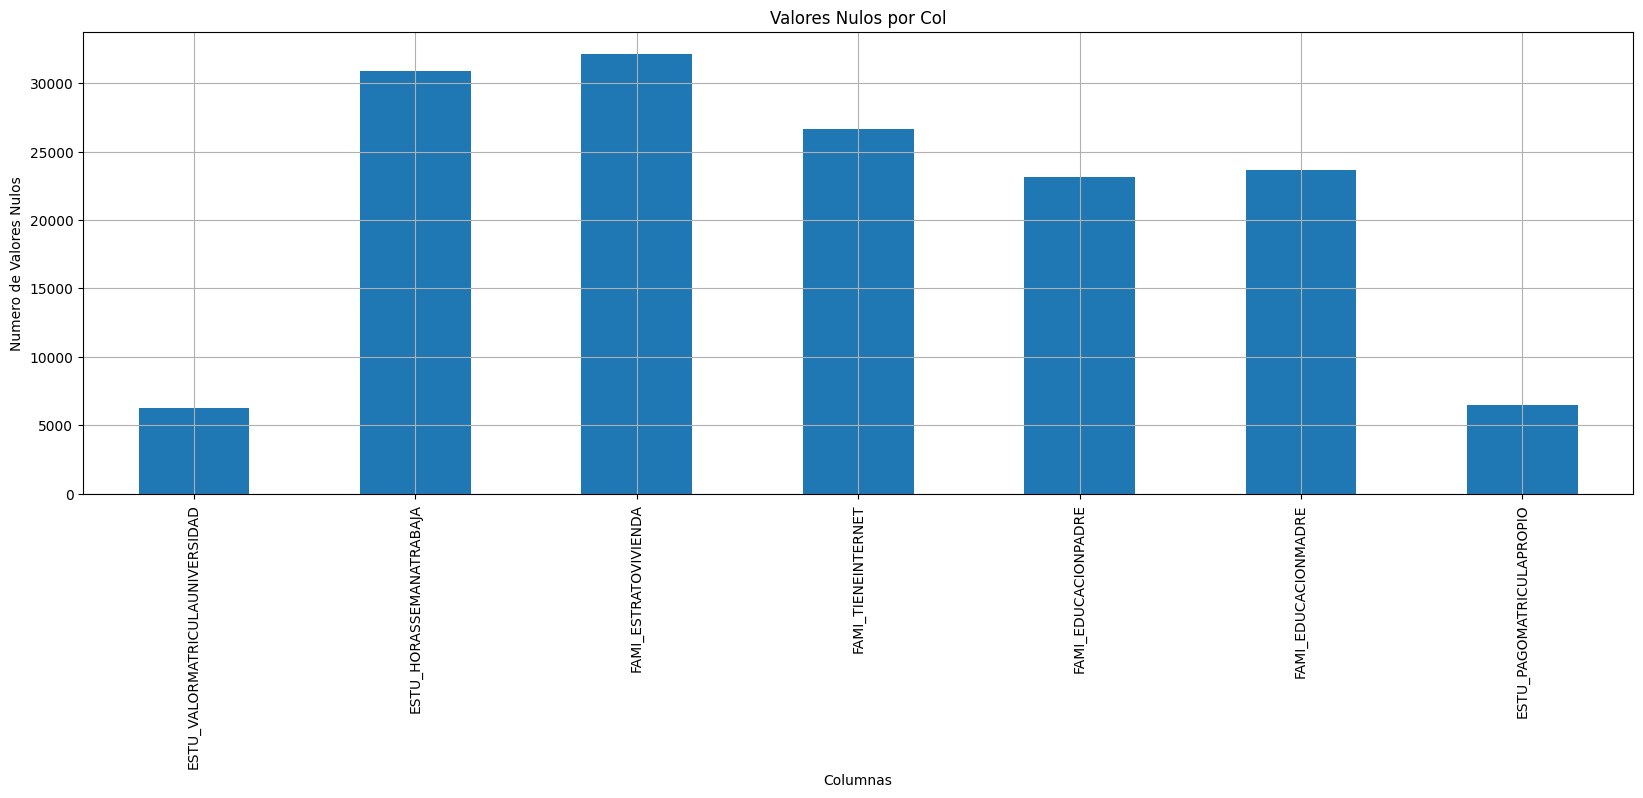

In [113]:
# Para visualizar los datos faltantes
plt.figure(figsize=(20, 6))
variablesFaltantes.plot(kind='bar')
plt.title("Valores Nulos por Col")
plt.xlabel("Columnas")
plt.ylabel("Numero de Valores Nulos")
plt.grid()
plt.show()

Podemos observar que hay varias columnas con una gran cantidad de datos faltantes, sin embargo estas cantidades son poco significativas teniendo en cuenta el total de 692500 de datos totales que existen. Continuaremos sin eliminar ninguna columna y organizaremos los datos nulos


In [24]:
ccols = [i for i in z.columns if not i in z._get_numeric_data()]
print (ccols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']


Tomaremos la columna de la variable a predecir RENDIMIENTO_GLOBAL, convertiremos sus valores a int para que tomar decisiones sobre la tabla restantes sea mas claro

In [144]:
# Diccionario de mapeo para RENDIMIENTO_GLOBAL
mapRendimiento = {'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3}

# Aplicar mapeo a las columnas respectivas
z['RENDIMIENTO_GLOBAL'] = z['RENDIMIENTO_GLOBAL'].map(mapRendimiento)

# Verificar los cambios
print(z[['RENDIMIENTO_GLOBAL']].head())

   RENDIMIENTO_GLOBAL
0                   2
1                   0
2                   0
3                   3
4                   1


# Variables binarias

Vamos a transformar las variables de las columnas ESTU_PAGOMATRICULAPROPIO y FAMI_TIENEINTERNET con opciones "Si" y "No", por entradas igualmente binarias 0 y 1.

Utilizaresmos 1 = "Si", 0 = "No".



In [145]:
mapBinary = {'Si': 1, 'S': 1, 'No': 0, 'N':0}

In [146]:
binaryColumns = ['FAMI_TIENEINTERNET' , 'ESTU_PAGOMATRICULAPROPIO']

In [147]:
for column in binaryColumns:
    z[column] = z[column].map(mapBinary)

In [148]:
# Calcula el recuento de valores faltantes en las columnas específicas
variablesFaltantesBinaryCol = z[binaryColumns].isnull().sum()

# Muestra los valores faltantes
print(variablesFaltantesBinaryCol)


FAMI_TIENEINTERNET          26629
ESTU_PAGOMATRICULAPROPIO     6498
dtype: int64


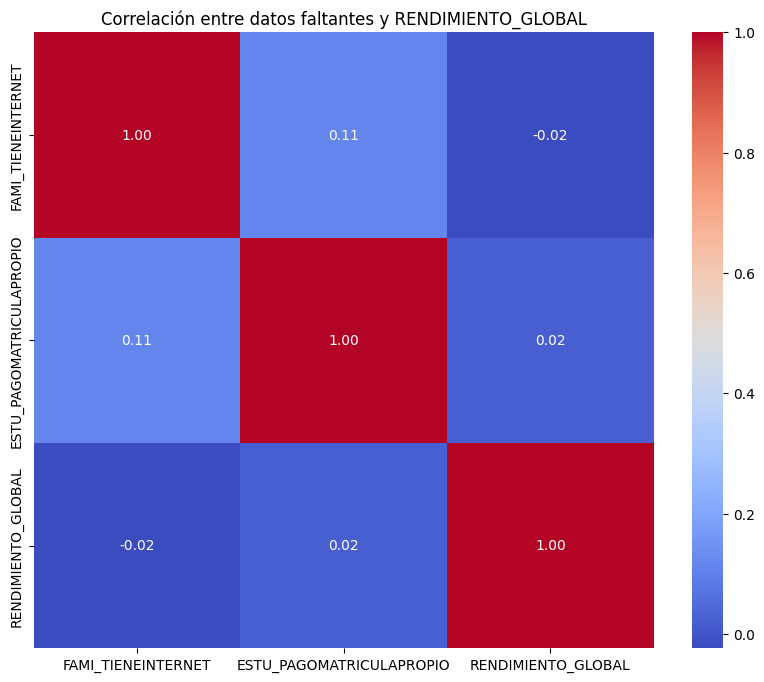

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcula el recuento de valores faltantes en las columnas específicas
variablesFaltantesBinaryCol = z[binaryColumns].isnull().sum()

# Crea variables binarias de datos faltantes
missing_data_binary = z[binaryColumns].isnull().astype(int)

# Concatena las variables binarias con la variable objetivo
data_with_missing = pd.concat([missing_data_binary, z['RENDIMIENTO_GLOBAL']], axis=1)

# Calcula la correlación entre las variables binarias y la variable objetivo
correlation_matrix = data_with_missing.corr()

# Visualiza la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre datos faltantes y RENDIMIENTO_GLOBAL')
plt.show()


Cómo muestra la grafica, las variables no guardan una alta correlacion con la variable a predecir. Teniento esto en mente, llenaremos los datos faltantes de estas columnas ingresando de forma aleatoria y en proporciones similares 0s y 1s.

In [150]:
# Definir las columnas de interés
columnas_de_interes = ['FAMI_TIENEINTERNET']


datos_imputados = z

# Iterar sobre las columnas de interés
for columna in columnas_de_interes:
    # Calcular la proporción de valores existentes
    proporciones = datos_imputados[columna].value_counts(normalize=True)

    # Calcular la proporción de 1 y 0
    prop_1 = proporciones.get(1, 0)
    prop_0 = proporciones.get(0, 0)

    # Imputar los valores faltantes de forma aleatoria
    datos_imputados[columna].fillna(np.random.choice([0, 1], p=[prop_0, prop_1]), inplace=True)

# Verificar si hay datos nulos en las columnas de interés después de la imputación
print("Datos nulos después de la imputación:")
print(datos_imputados[columnas_de_interes].isnull().sum())

Datos nulos después de la imputación:
FAMI_TIENEINTERNET    0
dtype: int64


<ipython-input-150-0100fe6f887e>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_imputados[columna].fillna(np.random.choice([0, 1], p=[prop_0, prop_1]), inplace=True)


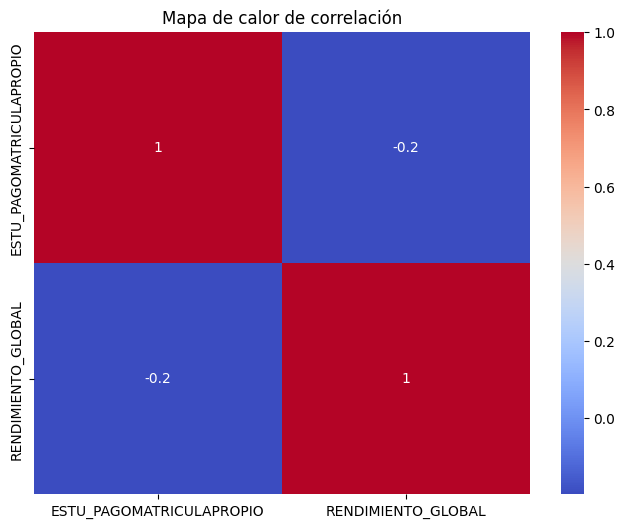

In [151]:
# Mapa de calor de correlación entre 'ESTU_PAGOMATRICULAPROPIO y RENDIMIENTO_GLOBAL
plt.figure(figsize=(8, 6))
sns.heatmap(z[['ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

Ya que existe una correlacion muy baja entre esta variable y la de interes, ademas de que sus datos faltantes corresponden a menos del 1% del total, tomaremos estos datos faltantes como un 0 o "No"

In [152]:
# Llenar los valores faltantes en la columna 'ESTU_PAGOMATRICULAPROPIO' con '0'
z['ESTU_PAGOMATRICULAPROPIO'].fillna(0, inplace=True)

<ipython-input-152-415ce6b3376f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['ESTU_PAGOMATRICULAPROPIO'].fillna(0, inplace=True)


In [153]:
z.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,1.0,Técnica o tecnológica incompleta,Postgrado,0.0,2
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,0.0,Técnica o tecnológica completa,Técnica o tecnológica incompleta,0.0,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,1.0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,0.0,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,1.0,No sabe,Secundaria (Bachillerato) completa,0.0,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,1.0,Primaria completa,Primaria completa,0.0,1
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,Estrato 5,1.0,Educación profesional completa,Secundaria (Bachillerato) completa,0.0,2
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,1.0,Educación profesional incompleta,Técnica o tecnológica completa,1.0,3
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,1.0,Primaria incompleta,Secundaria (Bachillerato) incompleta,1.0,1
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,1.0,Secundaria (Bachillerato) completa,Educación profesional incompleta,1.0,1
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,1.0,Postgrado,Postgrado,1.0,3


# Simplificar categoricas

Acontinuacion vamos a tratar las columnas con variables categoricas, podemos comenzar con FAMI_ESTRATOVIVIENDA. Vamos a convertir sus valores a datos numericos


In [154]:
categoricColumn = ['FAMI_ESTRATOVIVIENDA']

c="FAMI_ESTRATOVIVIENDA"

z[c].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [155]:
# Diccionario para FAMI_ESTRATOVIVIENDA
mapeo_estrato = {'Sin Estrato': 0, 'Estrato 1': 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4': 4, 'Estrato 5': 5, 'Estrato 6': 6}


# Aplicar map a las columnas
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].map(mapeo_estrato)

# Verificar los cambios
print(z[['FAMI_ESTRATOVIVIENDA']].head())

   FAMI_ESTRATOVIVIENDA
0                   3.0
1                   3.0
2                   3.0
3                   4.0
4                   3.0


In [166]:
faltantesEstrato = z['FAMI_ESTRATOVIVIENDA'].isnull().sum()
# Muestra los valores faltantes
print("Valores faltantes en FAMI_ESTRATOVIVIENDA:", faltantesEstrato)

Valores faltantes en FAMI_ESTRATOVIVIENDA: 32137


Vamos a procesar y graficar los datos para tomar decisiones

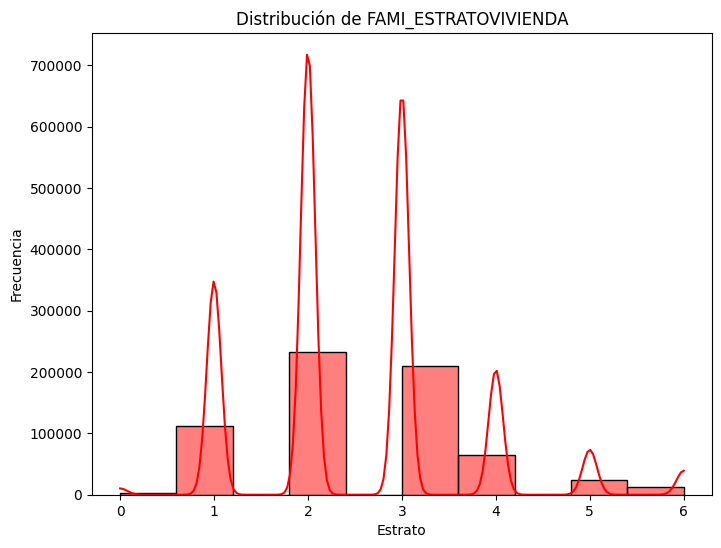

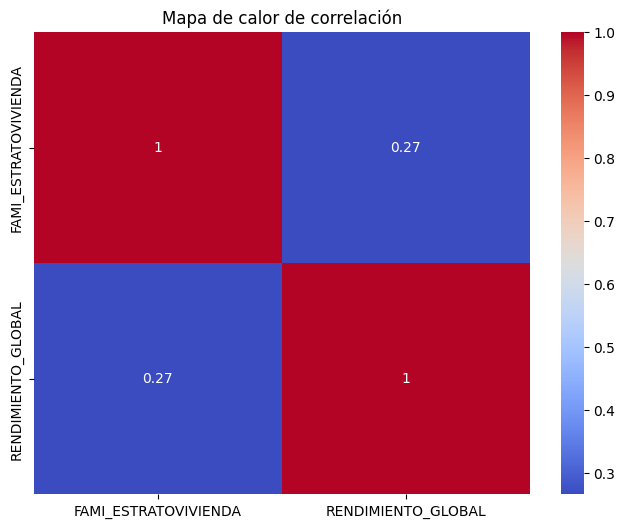

In [162]:
# Histograma de FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(8, 6))
sns.histplot(z['FAMI_ESTRATOVIVIENDA'], bins=10, kde=True, color='red')
plt.title('Distribución de FAMI_ESTRATOVIVIENDA')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

# Mapa de calor de correlación entre FAMI_ESTRATOVIVIENDA y RENDIMIENTO_GLOBAL
plt.figure(figsize=(8, 6))
sns.heatmap(z[['FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

In [167]:
# Calcular la media y la mediana de FAMI_ESTRATOVIVIENDA
media_estrato = z['FAMI_ESTRATOVIVIENDA'].mean()

# Imputar los valores faltantes con la media
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].fillna(media_estrato)

# Verificar que no hay valores faltantes después de la imputación
print(z[['FAMI_ESTRATOVIVIENDA']].isnull().sum())

FAMI_ESTRATOVIVIENDA    0
dtype: int64


In [158]:
media_estrato

2.5215131677577336

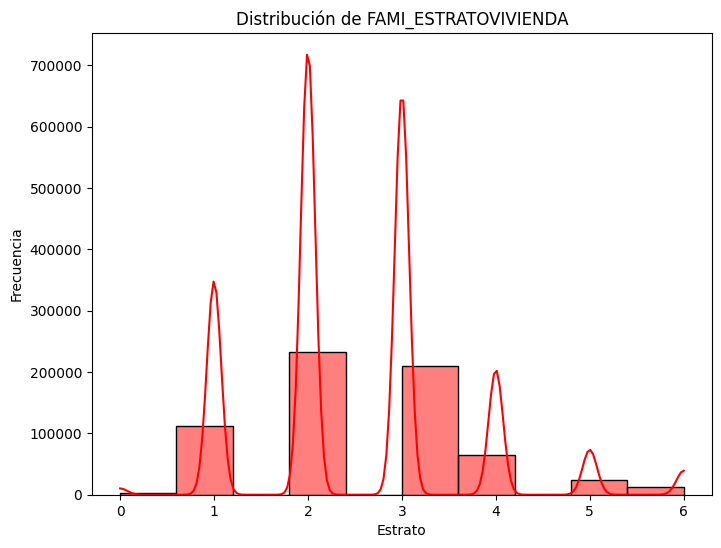

In [165]:
# Histograma de FAMI_ESTRATOVIVIENDA
plt.figure(figsize=(8, 6))
sns.histplot(z['FAMI_ESTRATOVIVIENDA'], bins=10, kde=True, color='red')
plt.title('Distribución de FAMI_ESTRATOVIVIENDA')
plt.xlabel('Estrato')
plt.ylabel('Frecuencia')
plt.show()

Como podemos observar el proceso por el que obtamos fue tomar la media total de los datos y asignarsela a los datos vacios, esta media fue 2.521, valor que aproximamos y le asignamos a el valor de estrato 2.


In [168]:
z['FAMI_ESTRATOVIVIENDA'] = z['FAMI_ESTRATOVIVIENDA'].astype(int)

# Verificar el cambio
print(z['FAMI_ESTRATOVIVIENDA'].dtype)

int64


In [169]:
c="FAMI_ESTRATOVIVIENDA"
z[c].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
2,264808
3,210685
1,111991
4,65514
5,23608
6,12605
0,3289


In [170]:
z.head(10)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,3,1.0,Técnica o tecnológica incompleta,Postgrado,0.0,2
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3,0.0,Técnica o tecnológica completa,Técnica o tecnológica incompleta,0.0,0
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,3,1.0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,0.0,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,4,1.0,No sabe,Secundaria (Bachillerato) completa,0.0,3
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,3,1.0,Primaria completa,Primaria completa,0.0,1
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,Más de 7 millones,Menos de 10 horas,5,1.0,Educación profesional completa,Secundaria (Bachillerato) completa,0.0,2
6,47159,20183,INGENIERIA MECANICA,HUILA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,2,1.0,Educación profesional incompleta,Técnica o tecnológica completa,1.0,3
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,2,1.0,Primaria incompleta,Secundaria (Bachillerato) incompleta,1.0,1
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,1,1.0,Secundaria (Bachillerato) completa,Educación profesional incompleta,1.0,1
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,5,1.0,Postgrado,Postgrado,1.0,3


# Variables continuas

Ahora vamos a tratar las variables que contienen un rango como valor. Estas son ESTU_VALORMATRICULAUNIVERSIDAD y ESTU_HORASSEMANATRABAJA

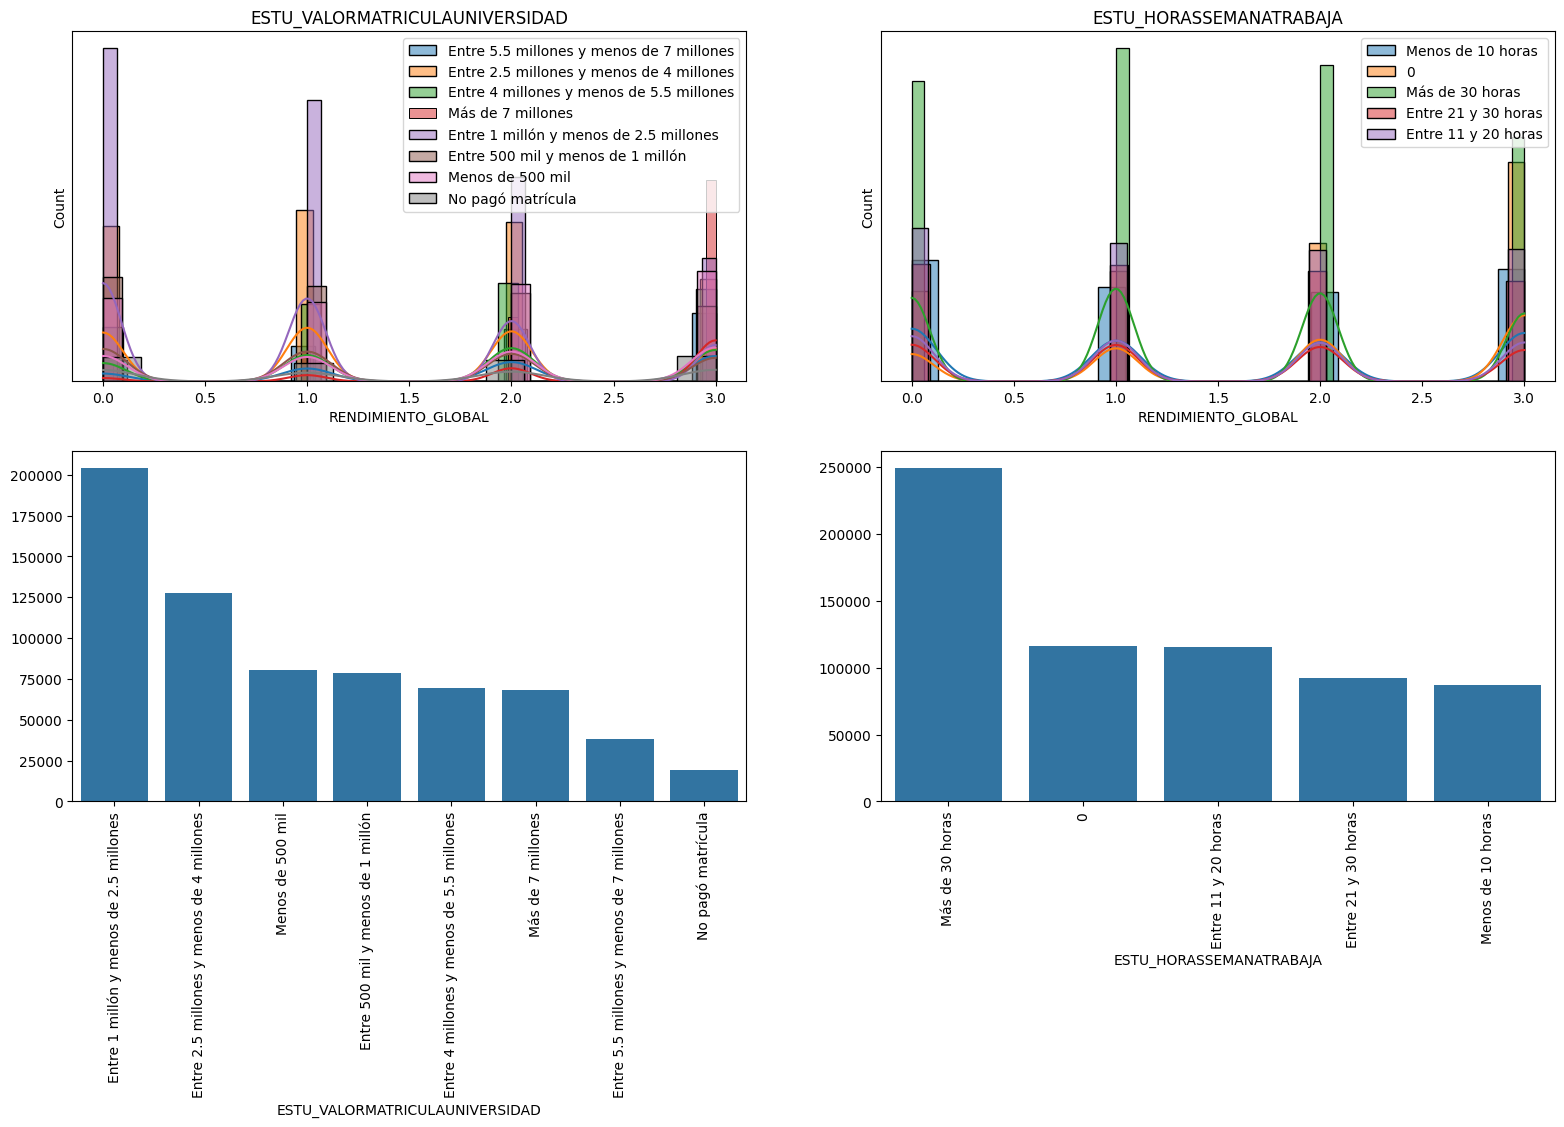

In [171]:
plt.figure(figsize=(40,10))
for i, c in enumerate(["ESTU_VALORMATRICULAUNIVERSIDAD", "ESTU_HORASSEMANATRABAJA"]):
    plt.subplot(2,4,i+1)
    k = z[[c,"RENDIMIENTO_GLOBAL"]].dropna()
    for v in z[c].dropna().unique():
        sns.histplot(k.RENDIMIENTO_GLOBAL[k[c]==v], label=v, kde=True)
        plt.title(c)
    plt.yticks([])
    plt.legend()
    plt.subplot(2,4,i+5)
    vc = k[c].value_counts()
    sns.barplot(x=vc.index, y=vc.values)
    plt.xticks(rotation="vertical")

- Gran parte de los estudiantes trabajan mas de 30 horas, los estudiantes que pagan entre 1 y 2.5 millones en la matricula son mayoria
- Los estudiantes que pagan mas de 7 millones tienden a sacar un puntaje alto


In [172]:
continueVariables = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA']

for c in continueVariables:
    print ("%10s"%c, np.unique(z[c].dropna()))

ESTU_VALORMATRICULAUNIVERSIDAD ['Entre 1 millón y menos de 2.5 millones'
 'Entre 2.5 millones y menos de 4 millones'
 'Entre 4 millones y menos de 5.5 millones'
 'Entre 5.5 millones y menos de 7 millones'
 'Entre 500 mil y menos de 1 millón' 'Menos de 500 mil'
 'Más de 7 millones' 'No pagó matrícula']
ESTU_HORASSEMANATRABAJA ['0' 'Entre 11 y 20 horas' 'Entre 21 y 30 horas' 'Menos de 10 horas'
 'Más de 30 horas']


In [173]:

# Definir el mapeo de categorías a valores numéricos para cada columna
mapeo_valores_matricula = {
    'No pagó matrícula': 0,
    'Menos de 500 mil': 1,
    'Entre 500 mil y menos de 1 millón': 2,
    'Entre 1 millón y menos de 2.5 millones': 3,
    'Entre 2.5 millones y menos de 4 millones': 4,
    'Entre 4 millones y menos de 5.5 millones': 5,
    'Entre 5.5 millones y menos de 7 millones': 6,
    'Más de 7 millones': 7
}

mapeo_valores_horas_trabajo = {
    '0': 0,
    'Menos de 10 horas': 1,
    'Entre 11 y 20 horas': 2,
    'Entre 21 y 30 horas': 3,
    'Más de 30 horas': 4
}

# Convertir las columnas a formato numérico utilizando el mapeo
z['ESTU_VALORMATRICULAUNIVERSIDAD'] = z['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapeo_valores_matricula)
z['ESTU_HORASSEMANATRABAJA'] = z['ESTU_HORASSEMANATRABAJA'].map(mapeo_valores_horas_trabajo)

# Verificar los cambios
print(z[['ESTU_VALORMATRICULAUNIVERSIDAD','ESTU_HORASSEMANATRABAJA']].head())


   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA
0                             6.0                      1.0
1                             4.0                      0.0
2                             4.0                      4.0
3                             5.0                      0.0
4                             4.0                      3.0


Procedemos a generar graficas para analizar los datos faltantes de las columnas


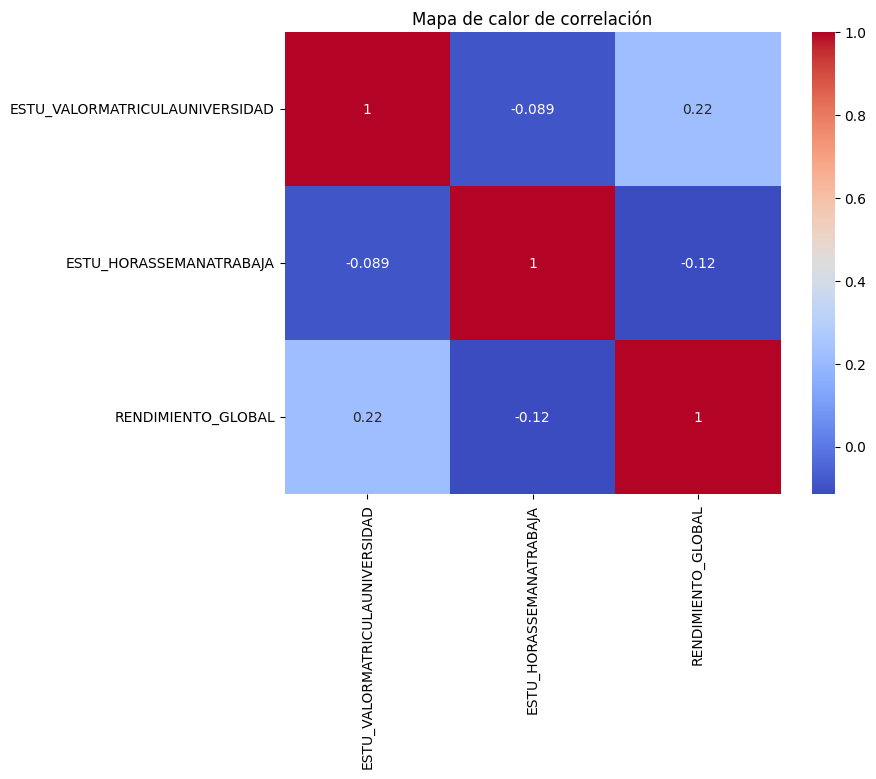

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(z[['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'RENDIMIENTO_GLOBAL']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

In [174]:
# veamos cuantos datos faltantes hay en estas columnas
valores_faltantes_matricula = z['ESTU_VALORMATRICULAUNIVERSIDAD'].isnull().sum()
valores_faltantes_horas_trabajo = z['ESTU_HORASSEMANATRABAJA'].isnull().sum()
# Muestra los valores faltantes
print("Valores faltantes en ESTU_VALORMATRICULAUNIVERSIDAD:", valores_faltantes_matricula)
print("Valores faltantes en ESTU_HORASSEMANATRABAJA:", valores_faltantes_horas_trabajo)


Valores faltantes en ESTU_VALORMATRICULAUNIVERSIDAD: 6287
Valores faltantes en ESTU_HORASSEMANATRABAJA: 30857


Luego de realizar el analisis podemos confirmar que ESTU_VALORMATRICULAUNIVERSIDAD tiene mayor correlacion con la variable a predecir, esta tiene pocos datos faltantes. Vamos a rellenarlos con la media de los datos totales

ESTU_HORASSEMANATRABAJA tiene una correlacion mucho menor, vamos a rellenar los datos de forma aleatoria


In [175]:

# Calcular la media total de la columna ESTU_VALORMATRICULAUNIVERSIDAD
media_valormatricula = z['ESTU_VALORMATRICULAUNIVERSIDAD'].mean()

# Remplazar los valores faltantes en ESTU_VALORMATRICULAUNIVERSIDAD con la media total
z['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(media_valormatricula, inplace=True)

# Obtener los valores únicos en la columna ESTU_HORASSEMANATRABAJA
valores_horas_trabajo = z['ESTU_HORASSEMANATRABAJA'].dropna().unique()

# Calcular la cantidad de valores faltantes en ESTU_HORASSEMANATRABAJA
num_valores_faltantes = z['ESTU_HORASSEMANATRABAJA'].isnull().sum()

# Remplazar los valores faltantes en ESTU_HORASSEMANATRABAJA de forma aleatoria
z.loc[z['ESTU_HORASSEMANATRABAJA'].isnull(), 'ESTU_HORASSEMANATRABAJA'] = np.random.choice(valores_horas_trabajo, num_valores_faltantes)



<ipython-input-175-c1fbd69d4433>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(media_valormatricula, inplace=True)


In [176]:
valores_faltantes = z.isnull().sum()

# Muestra los valores faltantes
print(valores_faltantes)

ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD        0
ESTU_HORASSEMANATRABAJA               0
FAMI_ESTRATOVIVIENDA                  0
FAMI_TIENEINTERNET                    0
FAMI_EDUCACIONPADRE               23178
FAMI_EDUCACIONMADRE               23664
ESTU_PAGOMATRICULAPROPIO              0
RENDIMIENTO_GLOBAL                    0
dtype: int64


# Estado

Hemos simplificado los valores de las columnas continuas, categoricas y binarias, tambien ajustamos la variable predictoria a valores numericos. Como podemos observar, ya hemos tratado los valores nulos de casi todas las columnas. Vamos a hablar un poco de FAMI_EDUCACIONPADRE Y FAMI_EDUCACIONMADRE

FAMI_EDUCACIONPADRE Y FAMI_EDUCACIONMADRE son columnas con variables cualitativas no jerarquicas

In [100]:
#Todos los valores unicos de FAMI_EDUCACIONPADRE Y FAMI_EDUCACIONMADRE

for c in ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']:
  print(f"Valores únicos de {c}: {z[c].unique()}")


Valores únicos de FAMI_EDUCACIONPADRE: ['Técnica o tecnológica incompleta' 'Técnica o tecnológica completa'
 'Secundaria (Bachillerato) completa' 'No sabe' 'Primaria completa'
 'Educación profesional completa' 'Educación profesional incompleta'
 'Primaria incompleta' 'Postgrado' nan
 'Secundaria (Bachillerato) incompleta' 'Ninguno' 'No Aplica']
Valores únicos de FAMI_EDUCACIONMADRE: ['Postgrado' 'Técnica o tecnológica incompleta'
 'Secundaria (Bachillerato) completa' 'Primaria completa'
 'Técnica o tecnológica completa' 'Secundaria (Bachillerato) incompleta'
 'Educación profesional incompleta' 'Educación profesional completa'
 'Primaria incompleta' nan 'Ninguno' 'No Aplica' 'No sabe']


In [178]:
# Eliminar de los valores de las columnas FAMI_EDUCACIONPADRE Y FAMI_EDUCACIONMADRE las palabras "Incompleto", "completo",

# Función para eliminar "Incompleto" y "completo" de las cadenas
def limpiar_cadena(cadena):
  if isinstance(cadena, str):
    cadena = cadena.replace("incompleta", "").replace("incompleto", "").replace("completo", "").replace("completa", "").strip()
  return cadena

# Aplicar la función a las columnas FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE
z['FAMI_EDUCACIONPADRE'] = z['FAMI_EDUCACIONPADRE'].apply(limpiar_cadena)
z['FAMI_EDUCACIONMADRE'] = z['FAMI_EDUCACIONMADRE'].apply(limpiar_cadena)

# Verificar los cambios
for c in ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']:
  print(f"Valores únicos de {c}: {z[c].unique()}")


Valores únicos de FAMI_EDUCACIONPADRE: ['Técnica o tecnológica' 'Secundaria (Bachillerato)' 'No sabe' 'Primaria'
 'Educación profesional' 'Postgrado' nan 'Ninguno' 'No Aplica']
Valores únicos de FAMI_EDUCACIONMADRE: ['Postgrado' 'Técnica o tecnológica' 'Secundaria (Bachillerato)'
 'Primaria' 'Educación profesional' nan 'Ninguno' 'No Aplica' 'No sabe']


Eliminarmos las palabras Incompleto y Completo y sus variaciones ya que queremos limpiar los valores para reducir su cantidad

Ahora vamos a rellenar los valores faltantes con la moda del dataset

In [179]:
# Calcula la moda para las columnas seleccionadas
moda_padre = z['FAMI_EDUCACIONPADRE'].mode()[0]
moda_madre = z['FAMI_EDUCACIONMADRE'].mode()[0]

# Rellena los valores faltantes con la moda
z['FAMI_EDUCACIONPADRE'].fillna(moda_padre, inplace=True)
z['FAMI_EDUCACIONMADRE'].fillna(moda_madre, inplace=True)

# Verifica que ya no haya datos faltantes
print(z.isnull().sum())

<ipython-input-179-a2d5a80c073e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  z['FAMI_EDUCACIONPADRE'].fillna(moda_padre, inplace=True)
<ipython-input-179-a2d5a80c073e>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

ID                                0
PERIODO                           0
ESTU_PRGM_ACADEMICO               0
ESTU_PRGM_DEPARTAMENTO            0
ESTU_VALORMATRICULAUNIVERSIDAD    0
ESTU_HORASSEMANATRABAJA           0
FAMI_ESTRATOVIVIENDA              0
FAMI_TIENEINTERNET                0
FAMI_EDUCACIONPADRE               0
FAMI_EDUCACIONMADRE               0
ESTU_PAGOMATRICULAPROPIO          0
RENDIMIENTO_GLOBAL                0
dtype: int64


Luego de haber reducido la cantidad de valores en las entradas FAMI_EDUCACIONPADRE Y FAMI_EDUCACIONMADRE, vamos a hacer one-hot encoding para simplificar aun mas los valores

In [180]:
import pandas as pd

# Aplicar one-hot encoding a las columnas 'FAMI_EDUCACIONPADRE' y 'FAMI_EDUCACIONMADRE'
z = pd.get_dummies(z, columns=['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], prefix=['PADRE_EDUCACION', 'MADRE_EDUCACION'])


print(z.head())

       ID  PERIODO         ESTU_PRGM_ACADEMICO ESTU_PRGM_DEPARTAMENTO  \
0  904256    20212                  ENFERMERIA                 BOGOTÁ   
1  645256    20212                     DERECHO              ATLANTICO   
2  308367    20203       MERCADEO Y PUBLICIDAD                 BOGOTÁ   
3  470353    20195  ADMINISTRACION DE EMPRESAS              SANTANDER   
4  989032    20212                  PSICOLOGIA              ANTIOQUIA   

   ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                             6.0                      1.0   
1                             4.0                      0.0   
2                             4.0                      4.0   
3                             5.0                      0.0   
4                             4.0                      3.0   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  ESTU_PAGOMATRICULAPROPIO  \
0                     3                 1.0                       0.0   
1                     3                 0.

In [181]:
# Asignar 0 para False y 1 para True en las columnas generadas por one-hot encoding
z.replace({True: 1, False: 0}, inplace=True)



<ipython-input-181-5e7e70dcb0a1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z.replace({True: 1, False: 0}, inplace=True)


# Nota importante

Durante el analisis a las columnas hemos dejado varios tipos en float, vamos a convertir el tipado de las columnas a int

In [182]:
# Lista de columnas que se desean convertir de float a int
columnas_float_a_entero = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
                           'FAMI_TIENEINTERNET',
                           'ESTU_PAGOMATRICULAPROPIO', 'FAMI_ESTRATOVIVIENDA']

# Convertir las columnas de float a enteros
z[columnas_float_a_entero] = z[columnas_float_a_entero].astype(int)

# Verificar los cambios
print(z.dtypes)


ID                                            int64
PERIODO                                       int64
ESTU_PRGM_ACADEMICO                          object
ESTU_PRGM_DEPARTAMENTO                       object
ESTU_VALORMATRICULAUNIVERSIDAD                int64
ESTU_HORASSEMANATRABAJA                       int64
FAMI_ESTRATOVIVIENDA                          int64
FAMI_TIENEINTERNET                            int64
ESTU_PAGOMATRICULAPROPIO                      int64
RENDIMIENTO_GLOBAL                            int64
PADRE_EDUCACION_Educación profesional         int64
PADRE_EDUCACION_Ninguno                       int64
PADRE_EDUCACION_No Aplica                     int64
PADRE_EDUCACION_No sabe                       int64
PADRE_EDUCACION_Postgrado                     int64
PADRE_EDUCACION_Primaria                      int64
PADRE_EDUCACION_Secundaria (Bachillerato)     int64
PADRE_EDUCACION_Técnica o tecnológica         int64
MADRE_EDUCACION_Educación profesional         int64
MADRE_EDUCAC

In [185]:
z.head(15)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,...,PADRE_EDUCACION_Secundaria (Bachillerato),PADRE_EDUCACION_Técnica o tecnológica,MADRE_EDUCACION_Educación profesional,MADRE_EDUCACION_Ninguno,MADRE_EDUCACION_No Aplica,MADRE_EDUCACION_No sabe,MADRE_EDUCACION_Postgrado,MADRE_EDUCACION_Primaria,MADRE_EDUCACION_Secundaria (Bachillerato),MADRE_EDUCACION_Técnica o tecnológica
0,904256,20212,ENFERMERIA,BOGOTÁ,6,1,3,1,0,2,...,0,1,0,0,0,0,1,0,0,0
1,645256,20212,DERECHO,ATLANTICO,4,0,3,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,4,4,3,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,5,0,4,1,0,3,...,0,0,0,0,0,0,0,0,1,0
4,989032,20212,PSICOLOGIA,ANTIOQUIA,4,3,3,1,0,1,...,0,0,0,0,0,0,0,1,0,0
5,659872,20203,MEDICINA VETERINARIA,ANTIOQUIA,7,1,5,1,0,2,...,0,0,0,0,0,0,0,0,1,0
6,47159,20183,INGENIERIA MECANICA,HUILA,4,3,2,1,1,3,...,0,0,0,0,0,0,0,0,0,1
7,11829,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,3,2,2,1,1,1,...,0,0,0,0,0,0,0,0,1,0
8,257869,20212,INGENIERIA INDUSTRIAL,ATLANTICO,6,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
9,465511,20183,ADMINISTRACION DE EMPRESAS,ANTIOQUIA,4,4,5,1,1,3,...,0,0,0,0,0,0,1,0,0,0


# Ultimas dos columnas

**ESTU_PRGM_DEPARTAMENTO**, para tratar esta columna, dividiremos los departamentos en las regiones de colombia. Para luego utilizar one hot en esta


In [188]:
unique_estu_prgm_departamento = z['ESTU_PRGM_DEPARTAMENTO'].nunique()
print(f"La cantidad de entradas únicas en ESTU_PRGM_DEPARTAMENTO es: {unique_estu_prgm_departamento}")


La cantidad de entradas únicas en ESTU_PRGM_DEPARTAMENTO es: 31


In [187]:
# Verificamos que esten los 30 Departamentos.
c="ESTU_PRGM_DEPARTAMENTO"
z[c].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018


Vemos que estan todos los departamentos menos el VICHADA

In [189]:

departamentosRegion = {
    'Caribe': ['ATLANTICO', 'BOLIVAR', 'CORDOBA', 'CESAR' 'LA GUAJIRA', 'MAGDALENA', 'SUCRE', 'SAN ANDRES'],
    'Andina': ['ANTIOQUIA', 'BOYACA', 'CUNDINAMARCA', 'RISARALDA', 'TOLIMA', 'CALDAS', 'CAUCA', 'HUILA', 'NORTE SANTANDER', 'QUINDIO', 'SANTANDER', 'BOGOTA'],
    'Pacifica': ['CHOCO', 'NARIÑO', 'VALLE'],
    'Orinoquia': ['ARAUCA', 'CASANARE', 'META'],
    'Amazonica': ['AMAZONAS', 'CAQUETA', 'GUAVIARE', 'VAUPES', 'PUTUMAYO'],
}
# Prefijo para los nombres de las nuevas columnas
prefijo_columnas = 'DEPARTAMENTO_'

# Crear columnas para cada región y asignar los departamentos correspondientes
for region, departamentos in departamentosRegion.items():
    z[prefijo_columnas + region.replace(' ', '_').upper()] = z['ESTU_PRGM_DEPARTAMENTO'].apply(lambda x: x if x in departamentos else None)

# Eliminar la columna original ESTU_PRGM_DEPARTAMENTO
z.drop(columns=['ESTU_PRGM_DEPARTAMENTO'], inplace=True)


print(z)

            ID  PERIODO                  ESTU_PRGM_ACADEMICO  \
0       904256    20212                           ENFERMERIA   
1       645256    20212                              DERECHO   
2       308367    20203                MERCADEO Y PUBLICIDAD   
3       470353    20195           ADMINISTRACION DE EMPRESAS   
4       989032    20212                           PSICOLOGIA   
...        ...      ...                                  ...   
692495   25096    20195                             BIOLOGIA   
692496  754213    20212                           PSICOLOGIA   
692497  504185    20183  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
692498  986620    20195                           PSICOLOGIA   
692499  933374    20195                           PSICOLOGIA   

        ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0                                    6                        1   
1                                    4                        0   
2                             

In [191]:

map_recurrencia_caribe = {'SAN ANDRES': 1, 'LA GUAJIRA': 2, 'CESAR': 3, 'SUCRE': 4, 'MAGDALENA': 5, 'CORDOBA': 6, 'BOLIVAR': 7, 'NORTE SANTANDER': 8, 'ATLANTICO': 9}
map_recurrencia_andina = {'QUINDIO': 1, 'HUILA': 2, 'CAUCA': 3, 'CALDAS': 4, 'TOLIMA': 5, 'RISARALDA': 6, 'CUNDINAMARCA': 7, 'BOYACA': 8, 'SANTANDER': 9, 'ANTIOQUIA': 10, 'BOGOTA': 11}
map_recurrencia_pacifica = {'CHOCO': 1, 'NARIÑO': 2, 'VALLE': 3}
map_recurrencia_orinoquia = {'ARAUCA': 1, 'CASANARE': 2, 'META': 3}
map_recurrencia_amazonica = {'VAUPES': 1, 'GUAVIARE': 2, 'AMAZONAS': 3, 'PUTUMAYO': 4, 'CAQUETA': 5}


z['DEPARTAMENTO_CARIBE'] = z['DEPARTAMENTO_CARIBE'].map(map_recurrencia_caribe)
z['DEPARTAMENTO_ANDINA'] = z['DEPARTAMENTO_ANDINA'].map(map_recurrencia_andina)
z['DEPARTAMENTO_PACIFICA'] = z['DEPARTAMENTO_PACIFICA'].map(map_recurrencia_pacifica)
z['DEPARTAMENTO_ORINOQUIA'] = z['DEPARTAMENTO_ORINOQUIA'].map(map_recurrencia_orinoquia)
z['DEPARTAMENTO_AMAZONICA'] = z['DEPARTAMENTO_AMAZONICA'].map(map_recurrencia_amazonica)

Observemos cuantas columnas tenemos en nuestro dataset


In [190]:
z.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET',
       'ESTU_PAGOMATRICULAPROPIO', 'RENDIMIENTO_GLOBAL',
       'PADRE_EDUCACION_Educación profesional', 'PADRE_EDUCACION_Ninguno',
       'PADRE_EDUCACION_No Aplica', 'PADRE_EDUCACION_No sabe',
       'PADRE_EDUCACION_Postgrado', 'PADRE_EDUCACION_Primaria',
       'PADRE_EDUCACION_Secundaria (Bachillerato)',
       'PADRE_EDUCACION_Técnica o tecnológica',
       'MADRE_EDUCACION_Educación profesional', 'MADRE_EDUCACION_Ninguno',
       'MADRE_EDUCACION_No Aplica', 'MADRE_EDUCACION_No sabe',
       'MADRE_EDUCACION_Postgrado', 'MADRE_EDUCACION_Primaria',
       'MADRE_EDUCACION_Secundaria (Bachillerato)',
       'MADRE_EDUCACION_Técnica o tecnológica', 'DEPARTAMENTO_CARIBE',
       'DEPARTAMENTO_ANDINA', 'DEPARTAMENTO_PACIFICA',
       'DEPARTAMENTO_ORINOQUIA', 'DEPARTAMENTO_AMAZONICA'],
      dtype='object')

Convertimos a int las ultimas columnas que creamos

In [192]:
columnas_reemplazar_departamentos = ['DEPARTAMENTO_CARIBE', 'DEPARTAMENTO_ANDINA', 'DEPARTAMENTO_PACIFICA', 'DEPARTAMENTO_ORINOQUIA', 'DEPARTAMENTO_AMAZONICA']
z[columnas_reemplazar_departamentos] = z[columnas_reemplazar_departamentos].fillna(0).astype(int)

**ESTU_PRGM_ACADEMICO** es la ultima columna de nuestro analisis, con esta tenemos una serie de retos. Ya que esta tiene los siguientes problemas

- Hay nombres de carreras ambiguos que representan en esencia lo mismo
- Hay errores ortograficos y caracteres especiales en las entradas
- Hay una gran cantidad de entradas que causarian problemas en la predicción

Vamos a solucionar estos problemas


In [193]:
pip install fuzzywuzzy[speedup]


Eliminamos los caracteres especiales y espacios multiples en las entradas

Luego con la libreria FuzzyWuzzy encontramos coincidencias potenciales en las entradas y las unificamos

In [195]:
import re
from fuzzywuzzy import process

# Función para normalizar el texto
def normalize_text(text):
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Normalizar la columna 'ESTU_PRGM_ACADEMICO'
z['ESTU_PRGM_ACADEMICO_NORMALIZADO'] = z['ESTU_PRGM_ACADEMICO'].apply(normalize_text)

# Diccionario para almacenar mapeos
text_map = {}

# Iterar sobre cada entrada única en la columna normalizada
for text in z['ESTU_PRGM_ACADEMICO_NORMALIZADO'].unique():
    match = process.extractOne(text, text_map.keys(), score_cutoff=90)

    if match:  # Verificamos que haya una coincidencia válida
        best_match, score = match  # Desempaquetamos solo si existe
        text_map[text] = text_map[best_match]
    else:
        # Si no hay match, el texto es considerado una nueva entrada
        text_map[text] = text

# Aplicar el mapeo de agrupación al DataFrame
z['ESTU_PRGM_ACADEMICO_LIMPIO'] = z['ESTU_PRGM_ACADEMICO_NORMALIZADO'].map(text_map)

# Verificar las agrupaciones
print(z[['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_ACADEMICO_LIMPIO']])


                        ESTU_PRGM_ACADEMICO  \
0                                ENFERMERIA   
1                                   DERECHO   
2                     MERCADEO Y PUBLICIDAD   
3                ADMINISTRACION DE EMPRESAS   
4                                PSICOLOGIA   
...                                     ...   
692495                             BIOLOGIA   
692496                           PSICOLOGIA   
692497  ADMINISTRACIÓN EN SALUD OCUPACIONAL   
692498                           PSICOLOGIA   
692499                           PSICOLOGIA   

                            ESTU_PRGM_ACADEMICO_LIMPIO  
0                                           enfermeria  
1                                              derecho  
2                                mercadeo y publicidad  
3                           administracion de empresas  
4                                           psicologia  
...                                                ...  
692495  licenciatura en biologia y e

In [ ]:
# Contar entradas únicas
unique_counts = z['ESTU_PRGM_ACADEMICO_LIMPIO'].nunique()
print(f"Existen {unique_counts} entradas únicas en ESTU_PRGM_ACADEMICO_LIMPIO.")

# Mostrar las entradas únicas
unique_entries = z['ESTU_PRGM_ACADEMICO_LIMPIO'].unique()
print("\nLas entradas únicas son:")
for entry in unique_entries:
  print(entry)


In [199]:
import re
from fuzzywuzzy import process

# Lista de palabras irrelevantes (stop words) que queremos eliminar
stop_words = [
    'profesional', 'universitario', 'en', 'la',
    'con', 'enfasis', 'para', 'industria', 'basica'
]

# Función para eliminar palabras irrelevantes
def remove_stop_words(text):
    # Dividimos el texto en palabras y eliminamos las que coincidan con las stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Aplicamos la función para eliminar términos irrelevantes
z['ESTU_PRGM_ACADEMICO_REDUCIDO'] = z['ESTU_PRGM_ACADEMICO_LIMPIO'].apply(remove_stop_words)

# Diccionario para almacenar mapeos
text_map = {}

# Iterar sobre cada entrada única en la columna reducida
for text in z['ESTU_PRGM_ACADEMICO_REDUCIDO'].unique():
    # Usar fuzzywuzzy para encontrar el mejor match con un umbral de similitud
    match = process.extractOne(text, text_map.keys(), score_cutoff=85)

    if match:  # Verificamos que match no sea None
        best_match, score = match  # Desempaquetamos la tupla solo si match es válido
        text_map[text] = text_map[best_match]  # Asignar la entrada al grupo ya existente
    else:
        # Si no hay match, agregarlo como nueva entrada en el mapa
        text_map[text] = text

# Crear una columna con las entradas agrupadas
z['ESTU_PRGM_ACADEMICO_FINAL'] = z['ESTU_PRGM_ACADEMICO_REDUCIDO'].map(text_map)

# Verificar los resultados
print(z[['ESTU_PRGM_ACADEMICO_LIMPIO', 'ESTU_PRGM_ACADEMICO_REDUCIDO', 'ESTU_PRGM_ACADEMICO_FINAL']].head())


   ESTU_PRGM_ACADEMICO_LIMPIO ESTU_PRGM_ACADEMICO_REDUCIDO  \
0                  enfermeria                   enfermeria   
1                     derecho                      derecho   
2       mercadeo y publicidad        mercadeo y publicidad   
3  administracion de empresas   administracion de empresas   
4                  psicologia                   psicologia   

    ESTU_PRGM_ACADEMICO_FINAL  
0                  enfermeria  
1                     derecho  
2       mercadeo y publicidad  
3  administracion de empresas  
4                  psicologia  


In [203]:
# prompt: quiero saber cuantas y cuales entradas UNICAS existen en ESTU_PRGM_ACADEMICO_LIMPIO

# Contar entradas únicas
unique_counts = z['ESTU_PRGM_ACADEMICO_FINAL'].nunique()
print(f"Existen {unique_counts} entradas únicas en ESTU_PRGM_ACADEMICO_FINAL.")

# Mostrar las entradas únicas
unique_entries = z['ESTU_PRGM_ACADEMICO_FINAL'].unique()
print("\nLas entradas únicas son:")
for entry in unique_entries:
  print(entry)


Existen 79 entradas únicas en ESTU_PRGM_ACADEMICO_FINAL.

Las entradas únicas son:
enfermeria
derecho
mercadeo y publicidad
administracion de empresas
psicologia
medicina veterinaria
ingenieria mecanica
administracin salud ocupacional
ingenieria industrial
administracin financiera
hoteleria y turismo
licenciatura ciencias sociales
licenciatura pedagogia infantil
comunicacion social
ciencia politica
maestro msica
trabajo social
ingenieria civil
contaduria pblica
estadistica
zootecnia
comunicacion audiovisual
licenciatura educacion humanidadesingles
odontologia
diseo industrial
economia
arquitectura
negocios internacionales
diseo grafico
quimica farmaceutica
relaciones internacionales
instrumentacion quirurgica
diseo visual
fisioterapia
farmacia
arte danzario
optometria
jurisprudencia
sociologia
estudios literarios
terapia respiratoria
ingeniera multimedia
administracion de calidad
traduccion inglesfrancesespaol
criminalistica
entrenamiento deportivo
administracion servicio
bacteriologia

In [204]:


import pandas as pd

# Diccionario de categorías
categorias = {
    "Ciencias de la Salud": [
        "enfermeria", "psicologia", "medicina veterinaria", "odontologia", "quimica farmaceutica",
        "instrumentacion quirurgica", "fisioterapia", "farmacia", "optometria", "bacteriologia",
        "terapia respiratoria", "fonoaudiologia"
    ],
    "Ingenierías": [
        "ingenieria mecanica", "ingenieria industrial", "ingenieria civil", "ingeniera multimedia"
    ],
    "Administración y Negocios": [
        "administracion de empresas", "administracin salud ocupacional", "administracin financiera",
        "hoteleria y turismo", "negocios internacionales", "agronegocios", "administracion de calidad",
        "administracion servicio"
    ],
    "Ciencias Sociales y Humanidades": [
        "derecho", "comunicacion social", "ciencia politica", "trabajo social", "sociologia",
        "relaciones internacionales", "jurisprudencia", "estudios literarios", "historia",
        "licenciatura ciencias sociales", "licenciatura pedagogia infantil", "licenciatura educacion humanidadesingles"
    ],
    "Artes y Diseño": [
        "maestro msica", "comunicacion audiovisual", "diseo industrial", "diseo grafico",
        "diseo visual", "arte danzario", "artes plasticas"
    ],
    "Ciencias Exactas y Naturales": [
        "estadistica", "zootecnia", "quimica farmaceutica", "agronomia", "geologia"
    ],
    "Otras": [
        "mercadeo y publicidad", "arquitectura", "economia", "criminalistica", "entrenamiento deportivo",
        "traduccion inglesfrancesespaol", "antropologia"
    ]
}

# Crear un diccionario inverso para mapear programas individuales a su categoría
mapeo_programas = {programa: categoria for categoria, programas in categorias.items() for programa in programas}

# Función para mapear cada programa académico a su categoría
z['CATEGORIA_PRGM_ACADEMICO'] = z['ESTU_PRGM_ACADEMICO_FINAL'].map(mapeo_programas)

z


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL,PADRE_EDUCACION_Educación profesional,...,DEPARTAMENTO_CARIBE,DEPARTAMENTO_ANDINA,DEPARTAMENTO_PACIFICA,DEPARTAMENTO_ORINOQUIA,DEPARTAMENTO_AMAZONICA,ESTU_PRGM_ACADEMICO_NORMALIZADO,ESTU_PRGM_ACADEMICO_LIMPIO,ESTU_PRGM_ACADEMICO_REDUCIDO,ESTU_PRGM_ACADEMICO_FINAL,CATEGORIA_PRGM_ACADEMICO
0,904256,20212,ENFERMERIA,6,1,3,1,0,2,0,...,0,0,0,0,0,enfermeria,enfermeria,enfermeria,enfermeria,Ciencias de la Salud
1,645256,20212,DERECHO,4,0,3,0,0,0,0,...,9,0,0,0,0,derecho,derecho,derecho,derecho,Ciencias Sociales y Humanidades
2,308367,20203,MERCADEO Y PUBLICIDAD,4,4,3,1,0,0,0,...,0,0,0,0,0,mercadeo y publicidad,mercadeo y publicidad,mercadeo y publicidad,mercadeo y publicidad,Otras
3,470353,20195,ADMINISTRACION DE EMPRESAS,5,0,4,1,0,3,0,...,0,9,0,0,0,administracion de empresas,administracion de empresas,administracion de empresas,administracion de empresas,Administración y Negocios
4,989032,20212,PSICOLOGIA,4,3,3,1,0,1,0,...,0,10,0,0,0,psicologia,psicologia,psicologia,psicologia,Ciencias de la Salud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,2,2,2,1,1,2,0,...,0,0,0,0,0,biologia,licenciatura en biologia y educacion ambiental,licenciatura biologia y educacion ambiental,mercadeo y publicidad,Otras
692496,754213,20212,PSICOLOGIA,4,4,3,1,0,0,0,...,0,0,0,0,0,psicologia,psicologia,psicologia,psicologia,Ciencias de la Salud
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,3,1,3,1,1,1,0,...,0,0,0,0,0,administracin en salud ocupacional,administracin en salud ocupacional,administracin salud ocupacional,administracin salud ocupacional,Administración y Negocios
692498,986620,20195,PSICOLOGIA,4,1,1,0,1,0,0,...,0,5,0,0,0,psicologia,psicologia,psicologia,psicologia,Ciencias de la Salud


In [205]:

columns_to_drop = ['ESTU_PRGM_ACADEMICO_NORMALIZADO', 'ESTU_PRGM_ACADEMICO_LIMPIO', 'ESTU_PRGM_ACADEMICO_REDUCIDO', 'ESTU_PRGM_ACADEMICO_FINAL', 'ESTU_PRGM_ACADEMICO']
z = z.drop(columns=columns_to_drop)


In [206]:
import pandas as pd

z = pd.get_dummies(z, columns=['CATEGORIA_PRGM_ACADEMICO'], prefix=['PRGM_ACADEMICO'])

# Mostrar las primeras filas del DataFrame resultante
print(z.head())

       ID  PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0  904256    20212                               6                        1   
1  645256    20212                               4                        0   
2  308367    20203                               4                        4   
3  470353    20195                               5                        0   
4  989032    20212                               4                        3   

   FAMI_ESTRATOVIVIENDA  FAMI_TIENEINTERNET  ESTU_PAGOMATRICULAPROPIO  \
0                     3                   1                         0   
1                     3                   0                         0   
2                     3                   1                         0   
3                     4                   1                         0   
4                     3                   1                         0   

   RENDIMIENTO_GLOBAL  PADRE_EDUCACION_Educación profesional  \
0                   2 

In [207]:
# Asignar 0 para False y 1 para True en las columnas generadas por one-hot encoding
z.replace({True: 1, False: 0}, inplace=True)


print(z.head(15))


<ipython-input-207-7a23dba5d465>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z.replace({True: 1, False: 0}, inplace=True)


        ID  PERIODO  ESTU_VALORMATRICULAUNIVERSIDAD  ESTU_HORASSEMANATRABAJA  \
0   904256    20212                               6                        1   
1   645256    20212                               4                        0   
2   308367    20203                               4                        4   
3   470353    20195                               5                        0   
4   989032    20212                               4                        3   
5   659872    20203                               7                        1   
6    47159    20183                               4                        3   
7    11829    20183                               3                        2   
8   257869    20212                               6                        1   
9   465511    20183                               4                        4   
10  273010    20203                               3                        2   
11  738026    20203                     

In [208]:

# Lista de columnas que se desean convertir de float a int
columnas_float_a_entero = z.select_dtypes(include=['float64']).columns.tolist()

# Convertir las columnas de float a enteros
z[columnas_float_a_entero] = z[columnas_float_a_entero].astype(int)

# Verificar los cambios
print(z.dtypes)


ID                                                int64
PERIODO                                           int64
ESTU_VALORMATRICULAUNIVERSIDAD                    int64
ESTU_HORASSEMANATRABAJA                           int64
FAMI_ESTRATOVIVIENDA                              int64
FAMI_TIENEINTERNET                                int64
ESTU_PAGOMATRICULAPROPIO                          int64
RENDIMIENTO_GLOBAL                                int64
PADRE_EDUCACION_Educación profesional             int64
PADRE_EDUCACION_Ninguno                           int64
PADRE_EDUCACION_No Aplica                         int64
PADRE_EDUCACION_No sabe                           int64
PADRE_EDUCACION_Postgrado                         int64
PADRE_EDUCACION_Primaria                          int64
PADRE_EDUCACION_Secundaria (Bachillerato)         int64
PADRE_EDUCACION_Técnica o tecnológica             int64
MADRE_EDUCACION_Educación profesional             int64
MADRE_EDUCACION_Ninguno                         